# Mini-Project(1)

## Exploring the data

### Importing the required libraries

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                   
import seaborn as sns                       
import pandas as pd                         
import numpy as np   
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor

### Loading the data

In [2]:
sdf=pd.read_csv("C:/Users/Admin/Downloads/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
sdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Shape of Dataset

In [3]:
sdf.shape

(14204, 12)

###### Here we can see that our dataset have 14204 rows and 12 columns

### Columns of Data

In [4]:
sdf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Information and Summary of dataset

In [5]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
sdf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Missing Value Treatment

In [7]:
sdf.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

###### Here we cann see that there are many null values in the Item_Outlet_Sales column of data.But as this contains around 40% of our data so we will not treat them

### We are setting Item Id as index as we know that every item has a different id

In [8]:
salesdf=sdf.set_index("Item_Identifier")

In [9]:
salesdf.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800


### Separating Categorical and Numerical Variables from the dataset

In [10]:
# Seprating out the categorical and continuous variables
def seprate_data_types(salesdf):
    categorical = []
    continuous = []
    for column in salesdf.columns:                # looping on the number of columns
        if salesdf[column].nunique() < 30:       # nunique:  returns unique values in the column,                                      #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)      
    return categorical, continuous 
categorical, continuous = seprate_data_types(salesdf)         # Calling the function
table = [categorical, continuous]
print("The below table is of Separated Categorical and Continous Variables from Dataset:")
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

The below table is of Separated Categorical and Continous Variables from Dataset:
categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Weight
Item_Type                  Item_Visibility
Outlet_Identifier          Item_MRP
Outlet_Establishment_Year  Item_Outlet_Sales
Outlet_Size
Outlet_Location_Type
Outlet_Type


## Exploratory Data Analysis

## $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

In [11]:
def cat_info(col): 
    print(f"Unique values in {col} are: {salesdf[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {salesdf[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {salesdf[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if salesdf[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

### Analysis of Item_Fat_Content

In [12]:
cat_info("Item_Fat_Content")

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


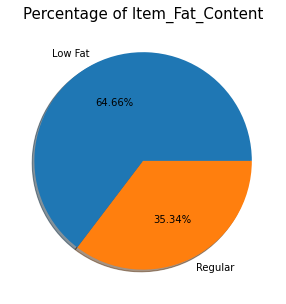

In [13]:
plt.figure(figsize=(15,5))
plt.title('Percentage of Item_Fat_Content',fontsize=15)
plt.pie(salesdf['Item_Fat_Content'].value_counts(),labels=salesdf['Item_Fat_Content'].unique(),autopct='%0.2f%%',shadow=True);

###### Here we can see that Item_Fat_Content contain Low Fat  around 65% of the total dataset

### Analysis of Item_Type

In [14]:
cat_info("Item_Type")

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


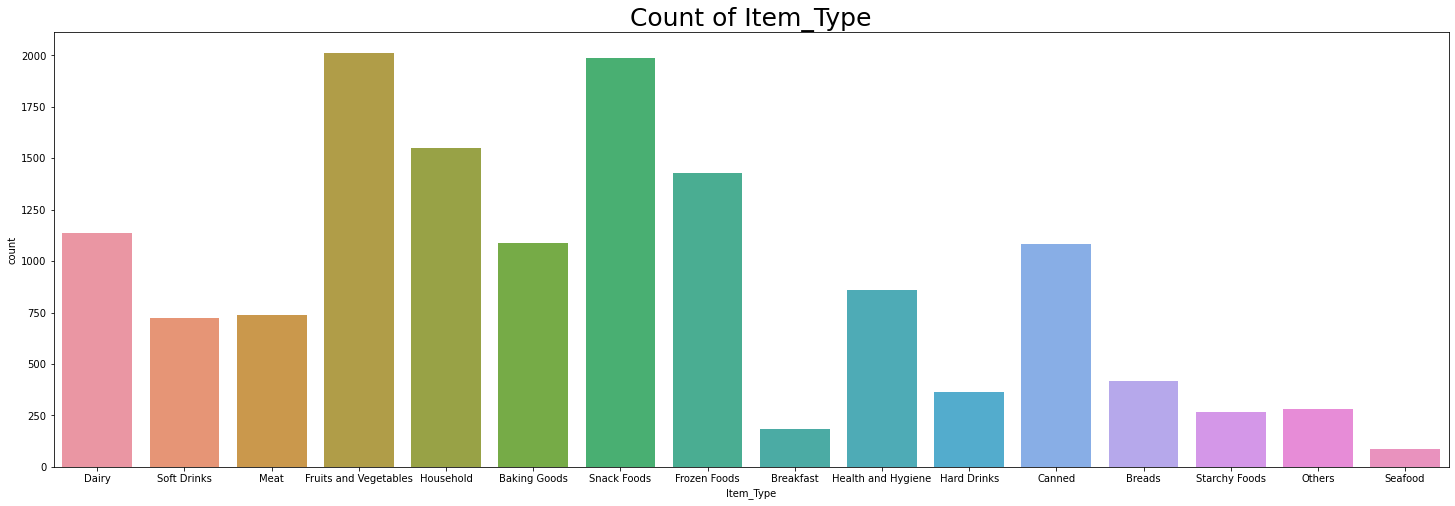

In [15]:
plt.figure(figsize=(25,8))
plt.title('Count of Item_Type',fontsize=25)
sns.countplot(salesdf['Item_Type']);

###### Here we can see that Fruits and vegetables have the highest count of population in Item Type of dataset

### Analysis of Outlet_Identifier

In [16]:
cat_info("Outlet_Identifier")

Unique values in Outlet_Identifier are: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Mode of Outlet_Identifier is OUT027
Number of missing values in Outlet_Identifier is 0


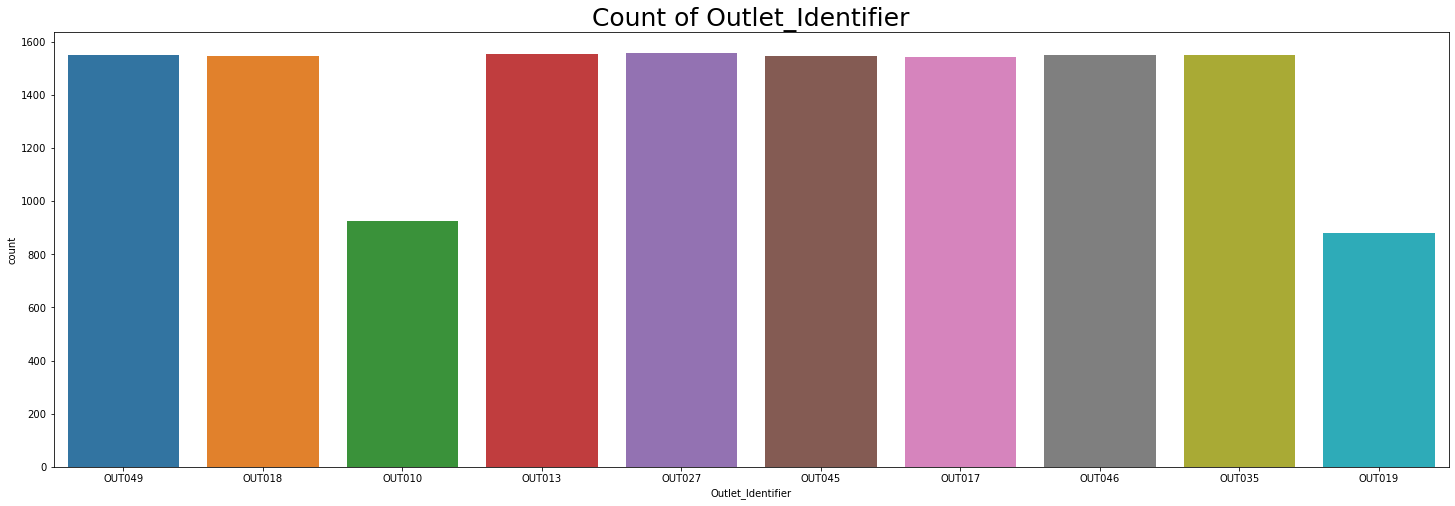

In [17]:
plt.figure(figsize=(25,8))
plt.title('Count of Outlet_Identifier',fontsize=25)
sns.countplot(salesdf['Outlet_Identifier']);

###### Here we can see that OUT019 have the lowest count of population in Outlet_Identifier of dataset

### Analysis of Outlet_Establishment_Year

In [18]:
cat_info("Outlet_Establishment_Year")

Unique values in Outlet_Establishment_Year are: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Mode of Outlet_Establishment_Year is 1985
Number of missing values in Outlet_Establishment_Year is 0


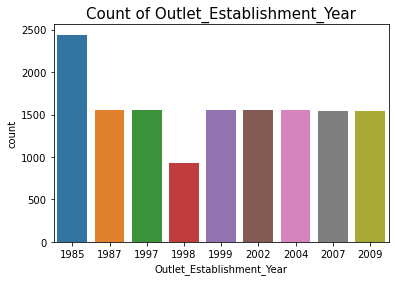

In [19]:
plt.title('Count of Outlet_Establishment_Year',fontsize=15)
sns.countplot(salesdf['Outlet_Establishment_Year']);

###### Here we can see that most of the items belongs to 1985 as their Outlet_Establishment_Year of dataset

### Analysis of Outlet_Size  

In [20]:
cat_info('Outlet_Size')

Unique values in Outlet_Size are: ['Medium' 'High' 'Small']
Mode of Outlet_Size is Small
Number of missing values in Outlet_Size is 0


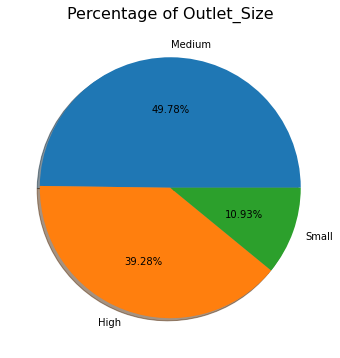

In [21]:
plt.figure(figsize=(16,6))
plt.title('Percentage of Outlet_Size',fontsize=16)
plt.pie(salesdf['Outlet_Size'].value_counts(),labels=salesdf['Outlet_Size'].unique(),autopct='%0.2f%%',shadow=True);

###### Here we can se that around 49% of the Outlets Size is medium

### Analysis of Outlet_Location_Type

In [22]:
cat_info('Outlet_Location_Type')

Unique values in Outlet_Location_Type are: ['Tier 1' 'Tier 3' 'Tier 2']
Mode of Outlet_Location_Type is Tier 3
Number of missing values in Outlet_Location_Type is 0


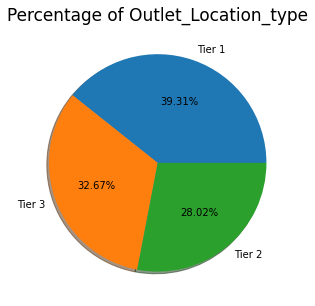

In [23]:
plt.figure(figsize=(15,5))
plt.title('Percentage of Outlet_Location_type',fontsize=17)
plt.pie(salesdf['Outlet_Location_Type'].value_counts(),labels=salesdf['Outlet_Location_Type'].unique(),autopct='%0.2f%%',shadow=True);

###### Here we can see that around 39% percent of the Outlet_Location_type is Tier 1 so it's the highest population

### Analysis of Outlet_Type

In [24]:
cat_info('Outlet_Type')

Unique values in Outlet_Type are: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Mode of Outlet_Type is Supermarket Type1
Number of missing values in Outlet_Type is 0


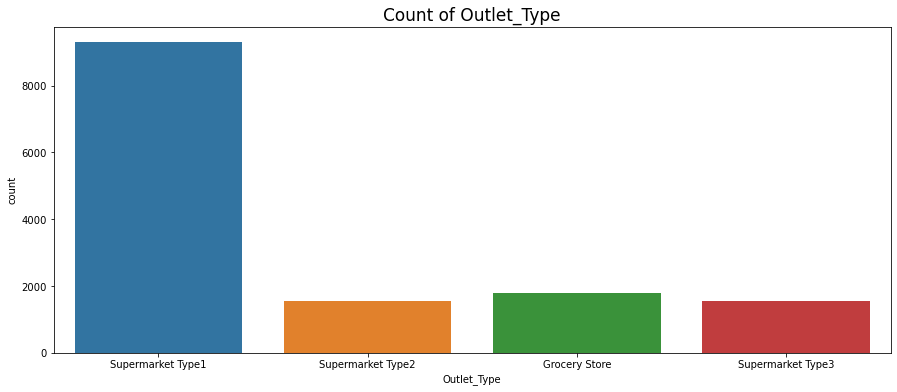

In [25]:
plt.figure(figsize=(15,6))
plt.title('Count of Outlet_Type',fontsize=17)
sns.countplot(salesdf['Outlet_Type']);

###### Here we can see that most of the population of Outlet_type is lies in Supermarket Type1

## $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical(Continuous) \ Variables$$

In [26]:
def num_info(col):
    print(f"The mean of the {col} is {salesdf[col].mean()}")
    print(f"The median of the {col} is {salesdf[col].median()}")
    print(f"The standard deviation of the {col} is {salesdf[col].std()}")
    print(f"Number of missing values in the {col} is {salesdf[col].isnull().sum()}")

### Analysis of Item_weight

In [27]:
num_info('Item_Weight')

The mean of the Item_Weight is 12.793380385807628
The median of the Item_Weight is 12.6
The standard deviation of the Item_Weight is 4.6517158036609825
Number of missing values in the Item_Weight is 0


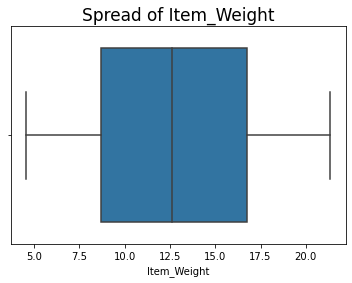

In [28]:
plt.title('Spread of Item_Weight',fontsize=17)
sns.boxplot(salesdf['Item_Weight']);

###### Here we can see that majority of the Item_Weight is lies between 9 to 17

### Analysis of Item_Visibility

In [29]:
num_info('Item_Visibility')

The mean of the Item_Visibility is 0.07030079341671354
The median of the Item_Visibility is 0.062347052
The standard deviation of the Item_Visibility is 0.048621198376929964
Number of missing values in the Item_Visibility is 0


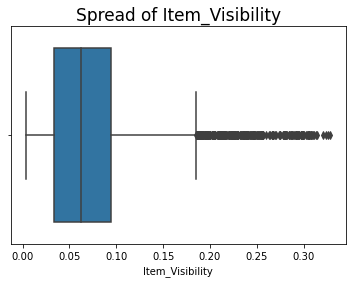

In [30]:
plt.title('Spread of Item_Visibility',fontsize=17)
sns.boxplot(salesdf['Item_Visibility']);

###### Here we can see that majority of Item Visibility lies between 0.03 to 0.09

### Analysis of  Item_MRP

In [31]:
num_info('Item_MRP')

The mean of the Item_MRP is 141.00497725992656
The median of the Item_MRP is 142.247
The standard deviation of the Item_MRP is 62.086938014763994
Number of missing values in the Item_MRP is 0


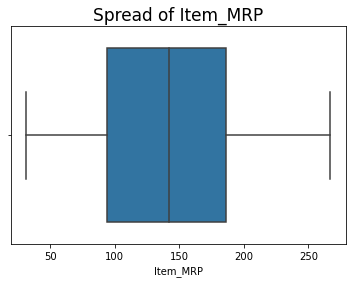

In [32]:
plt.title('Spread of Item_MRP',fontsize=17)
sns.boxplot(salesdf['Item_MRP']);

###### Here we can see that majority of Item MRP lies between 90 to 180

### Analysis of  Item_Outlet_Sales

In [33]:
num_info('Item_Outlet_Sales')

The mean of the Item_Outlet_Sales is 2181.2889135750365
The median of the Item_Outlet_Sales is 1794.331
The standard deviation of the Item_Outlet_Sales is 1706.499615733832
Number of missing values in the Item_Outlet_Sales is 5681


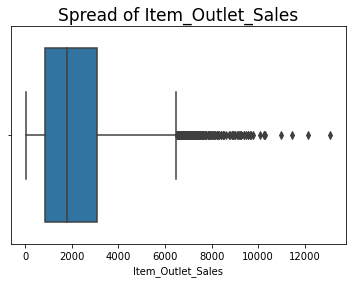

In [34]:
plt.title('Spread of Item_Outlet_Sales',fontsize=17)
sns.boxplot(salesdf['Item_Outlet_Sales']);

###### Here we can see that majority of Item Outlet Sales lies between 1500 to 2600

## $$\ Bivariate \ Analysis \$$

## Categorical to Categorical

In [35]:
salesdf["Item_Fat_Content"].groupby(salesdf["Item_Type"]).value_counts() 

Item_Type              Item_Fat_Content
Baking Goods           Regular              544
                       Low Fat              542
Breads                 Low Fat              222
                       Regular              194
Breakfast              Regular              120
                       Low Fat               66
Canned                 Low Fat              549
                       Regular              535
Dairy                  Low Fat              691
                       Regular              445
Frozen Foods           Low Fat              731
                       Regular              695
Fruits and Vegetables  Low Fat             1086
                       Regular              927
Hard Drinks            Low Fat              362
Health and Hygiene     Low Fat              858
Household              Low Fat             1548
Meat                   Regular              454
                       Low Fat              282
Others                 Low Fat              280


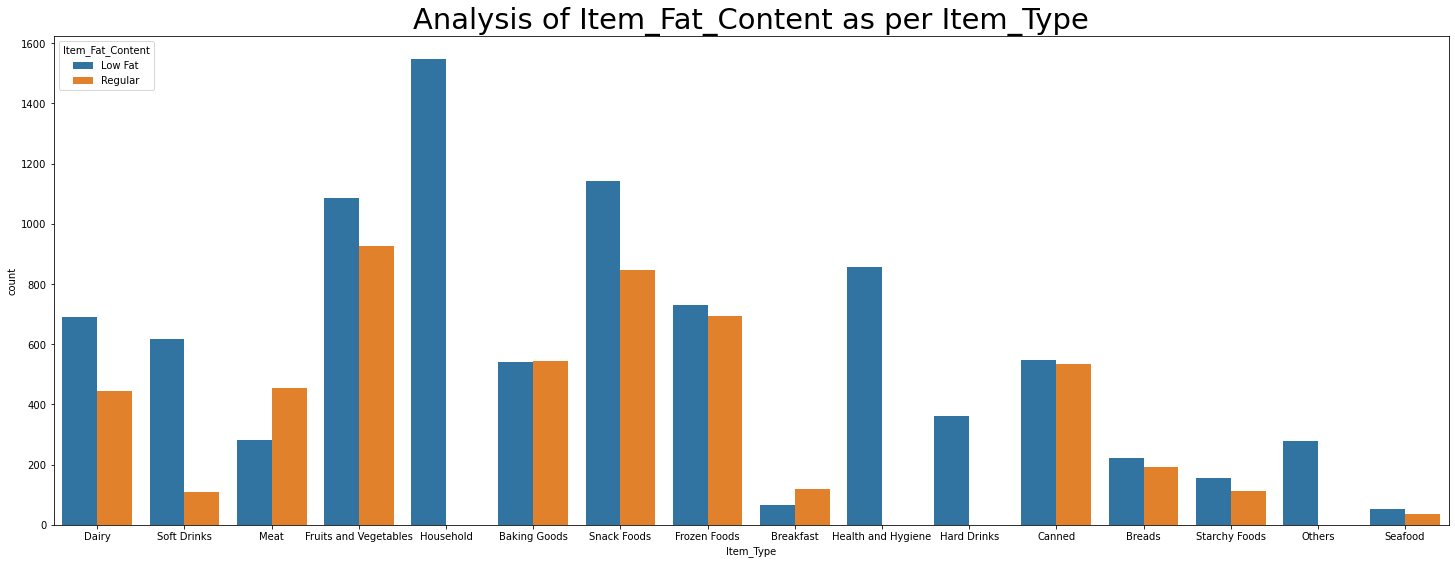

In [36]:
fig, ax = plt.subplots(figsize = (25, 9))
plt.title('Analysis of Item_Fat_Content as per Item_Type',fontsize=29)
sns.countplot(x = "Item_Type", hue = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that Household Item Types are the ones who have Highest Low fat and fruits and vegetables are the ones who have highest Regular Fat_Content

In [37]:
salesdf["Item_Fat_Content"].groupby(salesdf["Outlet_Identifier"]).value_counts() 

Outlet_Identifier  Item_Fat_Content
OUT010             Low Fat              595
                   Regular              330
OUT013             Low Fat             1004
                   Regular              549
OUT017             Low Fat              999
                   Regular              544
OUT018             Low Fat              999
                   Regular              547
OUT019             Low Fat              570
                   Regular              310
OUT027             Low Fat             1008
                   Regular              551
OUT035             Low Fat             1002
                   Regular              548
OUT045             Low Fat             1001
                   Regular              547
OUT046             Low Fat             1004
                   Regular              546
OUT049             Low Fat             1003
                   Regular              547
Name: Item_Fat_Content, dtype: int64

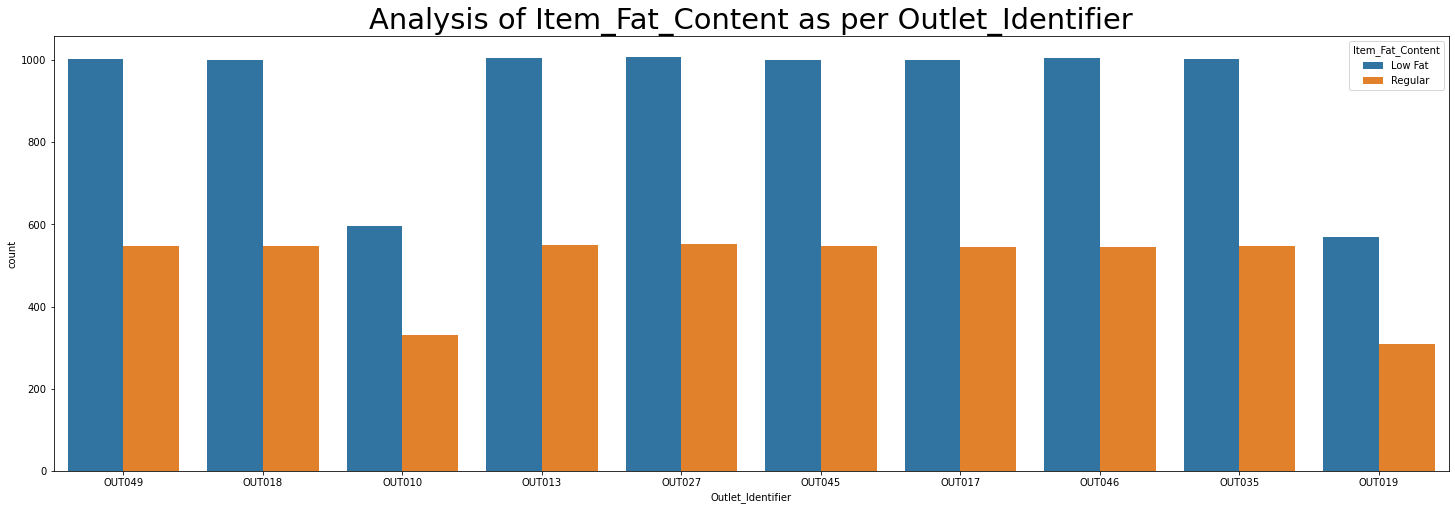

In [38]:
fig, ax = plt.subplots(figsize = (25, 8))
plt.title('Analysis of Item_Fat_Content as per Outlet_Identifier',fontsize=29)
sns.countplot(x = "Outlet_Identifier", hue = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that OUT010 Outlet_Identifier are the ones who have lowest Low fat and OUT019 Outlet_Identifier are the ones who have lowest Regular Fat_Content

In [39]:
salesdf["Item_Fat_Content"].groupby(salesdf["Outlet_Establishment_Year"]).value_counts() 

Outlet_Establishment_Year  Item_Fat_Content
1985                       Low Fat             1578
                           Regular              861
1987                       Low Fat             1004
                           Regular              549
1997                       Low Fat             1004
                           Regular              546
1998                       Low Fat              595
                           Regular              330
1999                       Low Fat             1003
                           Regular              547
2002                       Low Fat             1001
                           Regular              547
2004                       Low Fat             1002
                           Regular              548
2007                       Low Fat              999
                           Regular              544
2009                       Low Fat              999
                           Regular              547
Name: Item_Fat_Conte

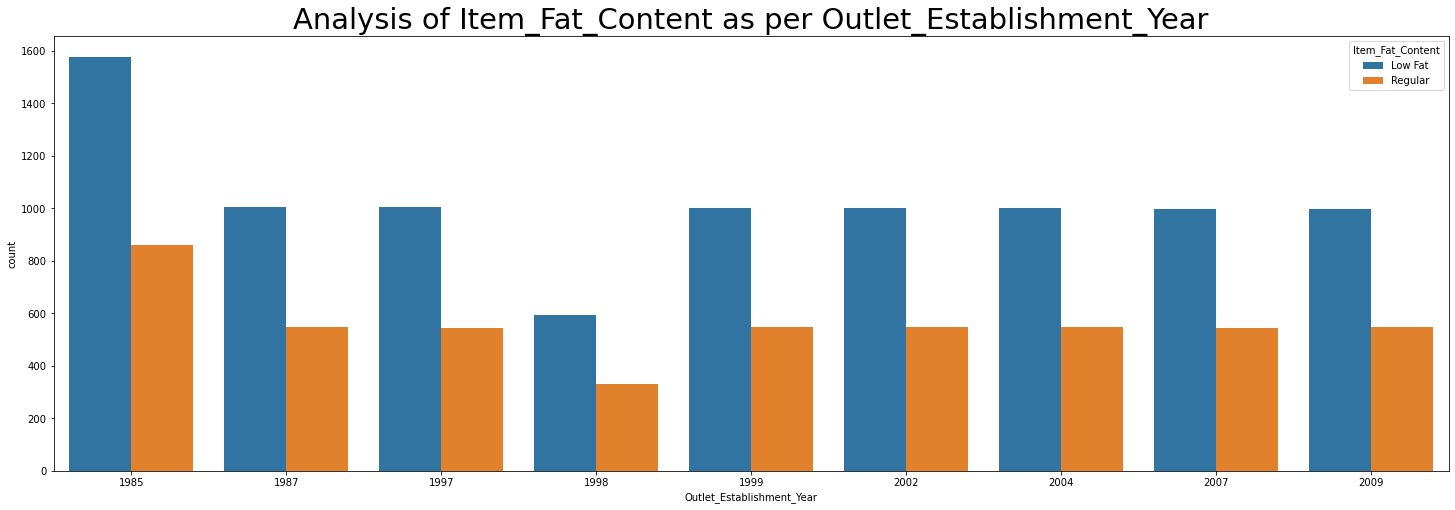

In [40]:
fig, ax = plt.subplots(figsize = (25, 8))
plt.title('Analysis of Item_Fat_Content as per Outlet_Establishment_Year',fontsize=29)
sns.countplot(x = "Outlet_Establishment_Year", hue = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that 1998 Outlet_Establishment_year is the one who have lowest Low fat and Regular Fat_Content

In [41]:
salesdf["Item_Fat_Content"].groupby(salesdf["Outlet_Size"]).value_counts() 

Outlet_Size  Item_Fat_Content
High         Low Fat             1004
             Regular              549
Medium       Low Fat             3605
             Regular             1975
Small        Low Fat             4576
             Regular             2495
Name: Item_Fat_Content, dtype: int64

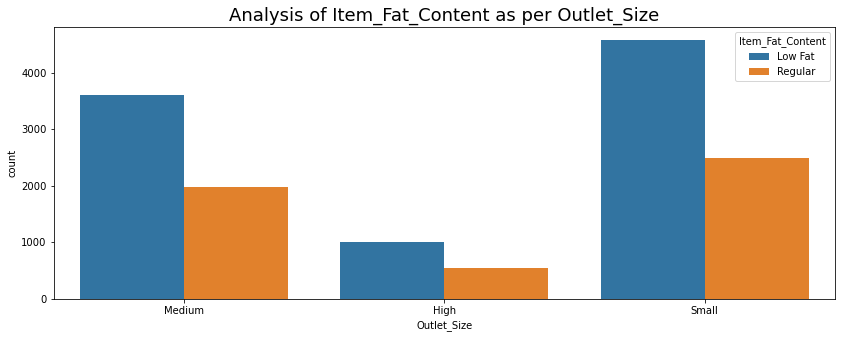

In [42]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.title('Analysis of Item_Fat_Content as per Outlet_Size',fontsize=18)
sns.countplot(x = "Outlet_Size", hue = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that High Outlet_Size is the one who have lowest Low fat and Regular Fat_Content

In [43]:
salesdf["Item_Fat_Content"].groupby(salesdf["Outlet_Location_Type"]).value_counts() 

Outlet_Location_Type  Item_Fat_Content
Tier 1                Low Fat             2577
                      Regular             1403
Tier 2                Low Fat             3002
                      Regular             1639
Tier 3                Low Fat             3606
                      Regular             1977
Name: Item_Fat_Content, dtype: int64

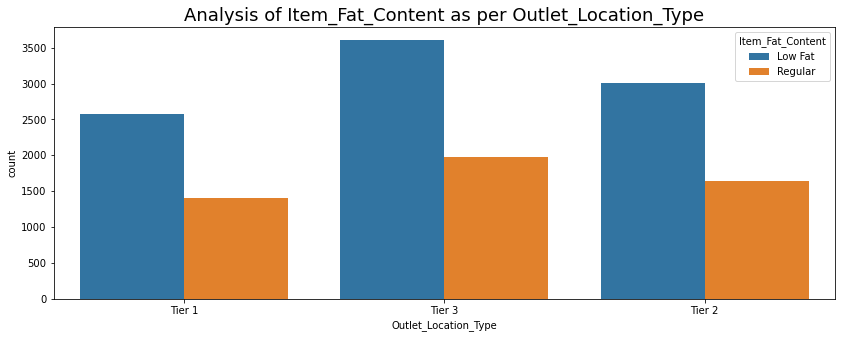

In [44]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.title('Analysis of Item_Fat_Content as per Outlet_Location_Type',fontsize=18)
sns.countplot(x = "Outlet_Location_Type", hue = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that Tier1 Outlet_location_type is the one who have lowest Low fat and Regular Fat_Content

In [45]:
salesdf["Item_Fat_Content"].groupby(salesdf["Outlet_Type"]).value_counts() 

Outlet_Type        Item_Fat_Content
Grocery Store      Low Fat             1165
                   Regular              640
Supermarket Type1  Low Fat             6013
                   Regular             3281
Supermarket Type2  Low Fat              999
                   Regular              547
Supermarket Type3  Low Fat             1008
                   Regular              551
Name: Item_Fat_Content, dtype: int64

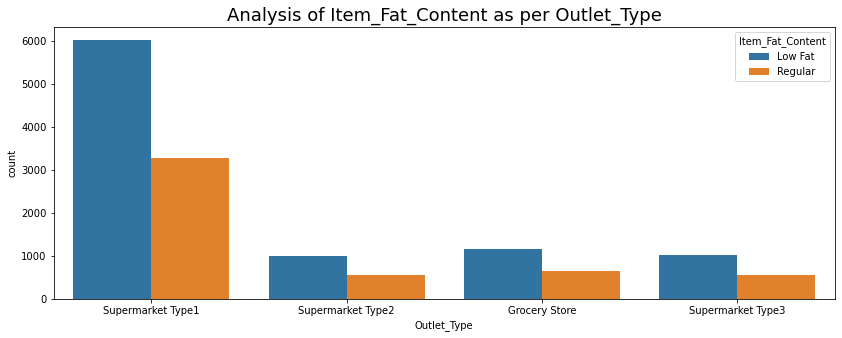

In [46]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.title('Analysis of Item_Fat_Content as per Outlet_Type',fontsize=18)
sns.countplot(x = "Outlet_Type", hue = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that SuperMarket Type2 Outlet_type is the one who have lowest Low fat and Regular Fat_Content

## Categorical to Continuous(Numerical)

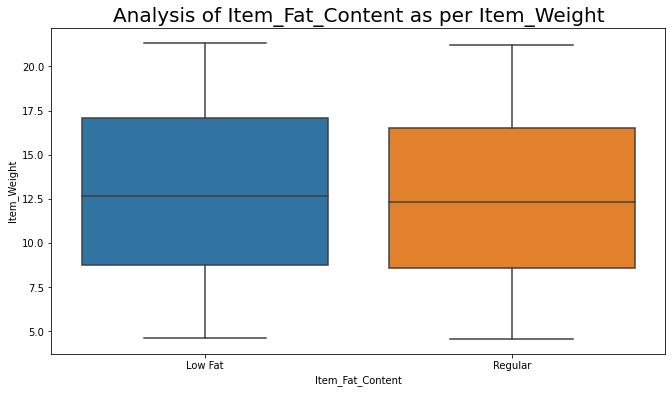

In [47]:
plt.figure(figsize=(11,6))
plt.title('Analysis of Item_Fat_Content as per Item_Weight',fontsize=20)
sns.boxplot(y = "Item_Weight", x = "Item_Fat_Content", data = salesdf)
plt.show()

###### For Low Fat majority of the Item Weight lies between 7.8 to 17.4 and for Regular majority of Item_weight lies between 7.6 to 17.2

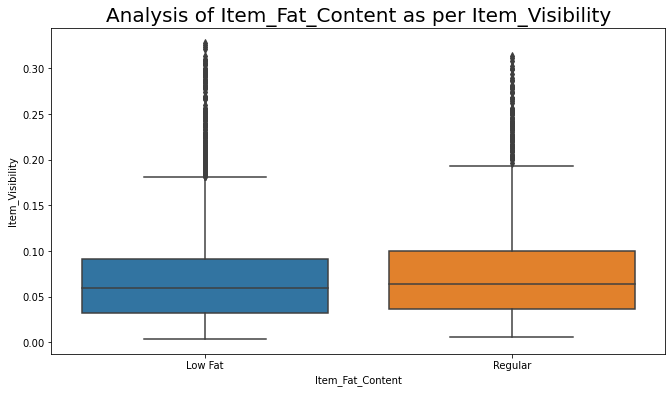

In [48]:
plt.figure(figsize=(11,6))
plt.title('Analysis of Item_Fat_Content as per Item_Visibility',fontsize=20)
sns.boxplot(y = "Item_Visibility", x = "Item_Fat_Content", data = salesdf)
plt.show()

###### For Low Fat majority of the Item Visibility lies between 0.3 to 0.8 and for Regular majority of Item_weight lies between 0.4 to 0.10

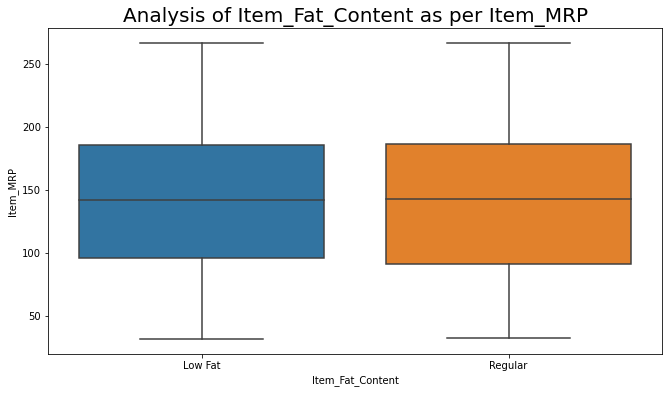

In [49]:
plt.figure(figsize=(11,6))
plt.title('Analysis of Item_Fat_Content as per Item_MRP',fontsize=20)
sns.boxplot(y = "Item_MRP", x = "Item_Fat_Content", data = salesdf)
plt.show()

###### For Low Fat majority of the Item MRP lies between 95 to 180 and for Regular majority of Item_weight lies between 90 to 180

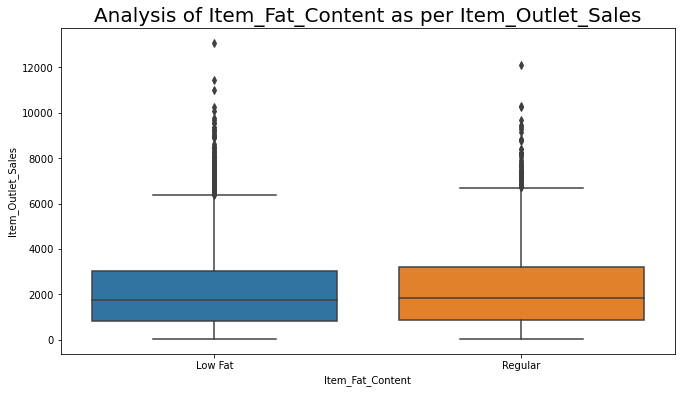

In [50]:
plt.figure(figsize=(11,6))
plt.title('Analysis of Item_Fat_Content as per Item_Outlet_Sales',fontsize=20)
sns.boxplot(y = "Item_Outlet_Sales", x = "Item_Fat_Content", data = salesdf)
plt.show()

###### Here we can see that the Outlet_Sales are lying in same range for both the type of fat containers

## Continuous to Continuous

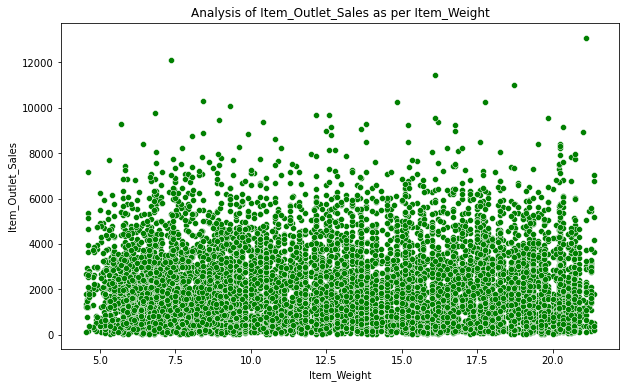

In [51]:
plt.figure(figsize=(10,6))
plt.title('Analysis of Item_Outlet_Sales as per Item_Weight',fontsize=12)
sns.scatterplot(y = "Item_Outlet_Sales", x = "Item_Weight", data = salesdf,color='g')
plt.show()

###### Here we can see that Item_Weight is not affecting the sales that much

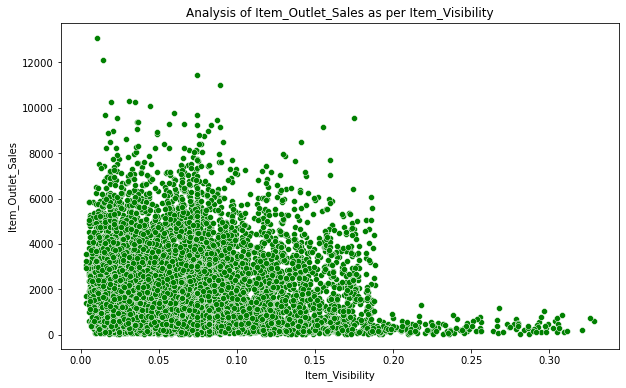

In [52]:
plt.figure(figsize=(10,6))
plt.title('Analysis of Item_Outlet_Sales as per Item_Visibility',fontsize=12)
sns.scatterplot(y = "Item_Outlet_Sales", x = "Item_Visibility", data = salesdf,color='g')
plt.show()

###### Here we can see that if Item_visibility increases than Sales decreases

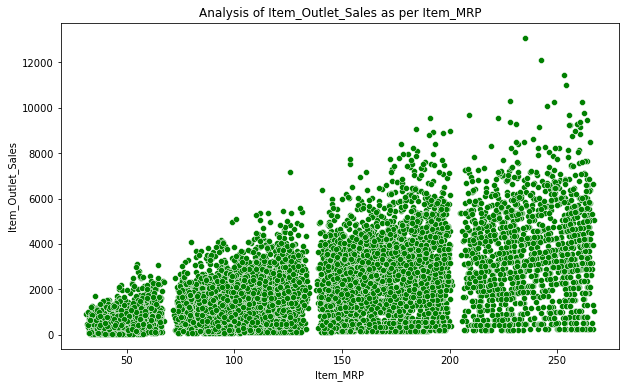

In [53]:
plt.figure(figsize=(10,6))
plt.title('Analysis of Item_Outlet_Sales as per Item_MRP',fontsize=12)
sns.scatterplot(y = "Item_Outlet_Sales", x = "Item_MRP", data = salesdf,color='g')
plt.show()

###### Here we can see that if th MRP of item is increasing then Sales is also increasing

### MultiVariate Analysis

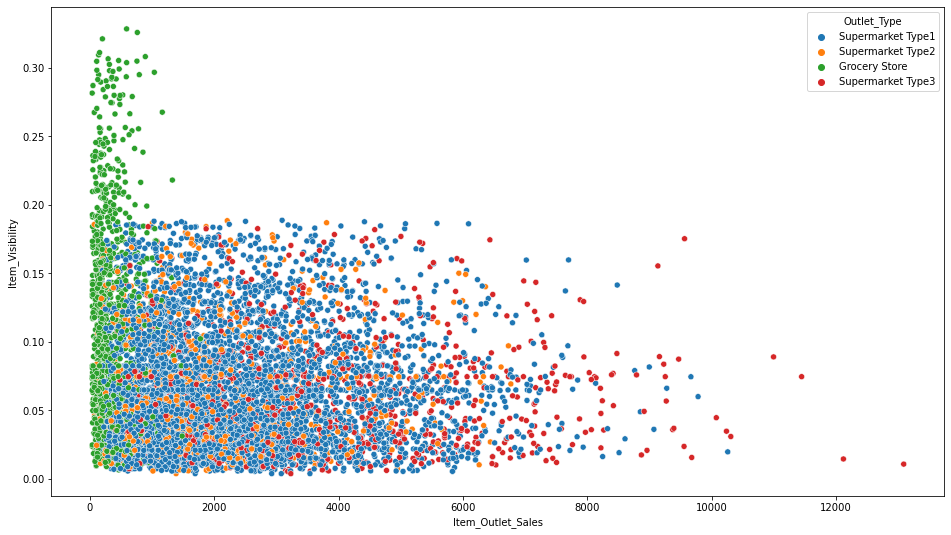

In [54]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=salesdf['Item_Outlet_Sales'],y=salesdf['Item_Visibility'],hue=salesdf['Outlet_Type'],markers='o');

###### Items in grocery shops have visibility but lowest sales

## Data Preprocessing

#### We are creating two datasets first which don't have null values in target variable and second one which have only the null values in target variable

In [55]:
dfn=salesdf.dropna()

In [56]:
dfn.shape

(8523, 11)

###### Here dfn is the one which don't have null values

In [57]:
dfin=salesdf[salesdf['Item_Outlet_Sales'].isnull()]

In [58]:
dfin.shape

(5681, 11)

###### dfin is the one which contains only null values in the target variable

### Label Encoding 

In [59]:
dfn.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###### Using Label Encoder technique to convert categorical or object column into numerical type

In [60]:
label_encoder=preprocessing.LabelEncoder()
dfn['Item_Type ']=label_encoder.fit_transform(dfn['Item_Type'])
dfn['Item_Fat_Content']=label_encoder.fit_transform(dfn['Item_Fat_Content'])
dfn['Outlet_Identifier']=label_encoder.fit_transform(dfn['Outlet_Identifier'])
dfn['Outlet_Size']=label_encoder.fit_transform(dfn['Outlet_Size'])
dfn['Outlet_Location_Type']=label_encoder.fit_transform(dfn['Outlet_Location_Type'])
dfn['Outlet_Type']=label_encoder.fit_transform(dfn['Outlet_Type'])
dfn.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type
Item_Identifier,,,,,,,,,,,,
FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,4
DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,14
FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,10
FDX07,19.20,1,0.074402,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,6


### Scaling the data

In [61]:
def featurescaling(scale):
    numerics=['int16','int32','int64','float16','float32','float64']
    new_df=dfn.select_dtypes(include=numerics)
    if scale=='minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scale=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scale

In [62]:
scale='vipul'
df_scale=featurescaling(scale)
df_scale.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type
0,-0.769246,-0.738147,-1.116357,1.747454,1.507813,0.139541,-0.575119,-1.369334,-0.252658,0.910601,-0.766479
1,-1.496813,1.354743,-1.050092,-1.489023,-0.607071,1.334103,-0.575119,1.091569,1.002972,-1.018440,1.608963
2,0.995858,-0.738147,-1.101738,0.010040,1.507813,0.139541,-0.575119,-1.369334,-0.252658,-0.049238,0.658786
3,1.361794,1.354743,0.080475,0.660050,-1.664513,0.020085,-0.575119,1.091569,-1.508289,-0.849103,-0.291391


###### By using StandardSacling method we are making the mean of the features 0 and the standard deviation of them is 1

## Correlation Heatmap

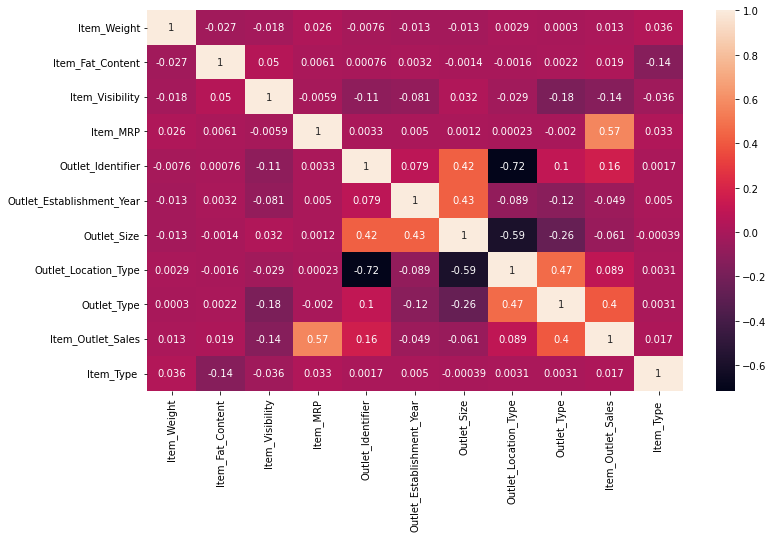

In [63]:
plt.figure(figsize=(12,7))
sns.heatmap(df_scale.corr(),annot=True);

###### By this heatmap we can see that Item_MRP,Outler_Type,Outler_Identifier,Item_Visibility are the variables which are correlated with the Item_outlet_Sales 

## Splitting the dataset into training and testing datasets

In [64]:
X=df_scale.drop('Item_Outlet_Sales',axis=1) #Here we are taking Item_Outlet_Sales as our target variable
y=df_scale['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

#### Linear regression Model

In [65]:
linearmodel=LinearRegression()

In [66]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [67]:
test_pred = linearmodel.predict(X_test)
test_pred

array([ 1.38741421, -0.64438781, -0.02578362, ...,  0.76568495,
       -0.67900318,  1.05158718])

In [68]:
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)
print('R^2(accuracy) Value of LinearRegression Model on testing data=',linearmodel.score(X_test,y_test))
print('\nMSE Value of LinearRegression Model=',MSE)
print('\nMAE Value of LinearRegression Model=',MAE)
print('\nRMSE Value of LinearRegression Model=',RMSE)
print('\nR^2(accuracy) Value of LinearRegression Model on training data=',linearmodel.score(X_train,y_train))

R^2(accuracy) Value of LinearRegression Model on testing data= 0.49681240272826

MSE Value of LinearRegression Model= 0.4963458294350104

MAE Value of LinearRegression Model= 0.5383366426506889

RMSE Value of LinearRegression Model= 0.704518154084769

R^2(accuracy) Value of LinearRegression Model on training data= 0.5044589657586613


#### Bagging with RandomForestRegression

In [69]:
RFModel=RandomForestRegressor()

In [70]:
RFModel.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
test_pred_RF=RFModel.predict(X_test)
test_pred_RF

array([ 1.08299736, -0.40014827, -0.95840753, ...,  1.55466436,
       -0.35695943,  0.93419117])

In [72]:
print('R^2(accuracy) Value of RandomForestRegression Model on testing data=',RFModel.score(X_test,y_test))
print('\nMAE Value of RandomForestRegression Model=',mean_absolute_error(y_test,test_pred_RF))
print('\nMSE Value of RandomForestRegression Model=',mean_squared_error(y_test,test_pred_RF))
print('\nRMSEValue of RandomForestRegression Model=',np.sqrt(mean_squared_error(y_test,test_pred_RF)))
print('\nR^2(accuracy) Value of RandomForestRegression Model on training data=',RFModel.score(X_train,y_train))

R^2(accuracy) Value of RandomForestRegression Model on testing data= 0.5425077869113135

MAE Value of RandomForestRegression Model= 0.47250650068465333

MSE Value of RandomForestRegression Model= 0.45127175867757724

RMSEValue of RandomForestRegression Model= 0.6717676374145879

R^2(accuracy) Value of RandomForestRegression Model on training data= 0.9387632948725515


### DecisiontreeRegressor Model

In [73]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [74]:
kf = KFold(n_splits=10, shuffle=True, random_state=20)
max_depth = [1,2,3,4,5,6,7,8,9,10]
max_leaf_nodes=[10,11,12,13,14,15,16,17,18]
for val in max_depth:
    for j in max_leaf_nodes:
        
        score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val,max_leaf_nodes=j, random_state= 20), X, y, cv= kf, scoring="neg_mean_squared_error")
        print(f'For max depth: {val},for max leaf node :{j}')
        rmse(score.mean())

For max depth: 1,for max leaf node :10
rmse= 0.87
For max depth: 1,for max leaf node :11
rmse= 0.87
For max depth: 1,for max leaf node :12
rmse= 0.87
For max depth: 1,for max leaf node :13
rmse= 0.87
For max depth: 1,for max leaf node :14
rmse= 0.87
For max depth: 1,for max leaf node :15
rmse= 0.87
For max depth: 1,for max leaf node :16
rmse= 0.87
For max depth: 1,for max leaf node :17
rmse= 0.87
For max depth: 1,for max leaf node :18
rmse= 0.87
For max depth: 2,for max leaf node :10
rmse= 0.75
For max depth: 2,for max leaf node :11
rmse= 0.75
For max depth: 2,for max leaf node :12
rmse= 0.75
For max depth: 2,for max leaf node :13
rmse= 0.75
For max depth: 2,for max leaf node :14
rmse= 0.75
For max depth: 2,for max leaf node :15
rmse= 0.75
For max depth: 2,for max leaf node :16
rmse= 0.75
For max depth: 2,for max leaf node :17
rmse= 0.75
For max depth: 2,for max leaf node :18
rmse= 0.75
For max depth: 3,for max leaf node :10
rmse= 0.69
For max depth: 3,for max leaf node :11
rmse= 0.69


#### Now we are tuning our model with the hyperparameters

In [75]:
DTModel=DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_leaf_nodes=12)
DTModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12, min_samples_split=5)

In [76]:
DTModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12, min_samples_split=5)

In [77]:
test_pred_DT=DTModel.predict(X_test)
test_pred_DT

array([ 0.99011964, -0.37926221, -0.99924903, ...,  0.99011964,
       -0.75710479,  0.99011964])

In [78]:
MAE = mean_absolute_error(y_test,test_pred_DT)
MSE = mean_squared_error(y_test,test_pred_DT)
RMSE = np.sqrt(MSE)
print('R^2(accuracy) Value of DecisionTreeRegression Model on testing data=',DTModel.score(X_test,y_test))
print('\nMSE Value of DecisionTreeRegression Model=',MSE)
print('\nMAE Value of DecisionTreeRegression Model=',MAE)
print('\nRMSE Value of DecisionTreeRegression Model=',RMSE)
print('\nR^2(accuracy) Value of DecisionTreeRegression Model on training data=',DTModel.score(X_train,y_train))

R^2(accuracy) Value of DecisionTreeRegression Model on testing data= 0.5708141206669415

MSE Value of DecisionTreeRegression Model= 0.4233503019835363

MAE Value of DecisionTreeRegression Model= 0.4645863758179122

RMSE Value of DecisionTreeRegression Model= 0.6506537496883702

R^2(accuracy) Value of DecisionTreeRegression Model on training data= 0.5989136462247052


### Boosting using AdaboostRegressor Model

In [79]:
ADBModel = AdaBoostRegressor(n_estimators = 10,learning_rate = 1.0,random_state = 101)

In [80]:
ADBModel.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=10, random_state=101)

In [81]:
test_pred_ADB= ADBModel.predict(X_test)
test_pred_ADB

array([ 1.42420856, -0.43802045, -0.95918244, ...,  1.06925238,
       -0.5092434 ,  1.42420856])

In [82]:
MAE = mean_absolute_error(y_test,test_pred_ADB)
MSE = mean_squared_error(y_test,test_pred_ADB)
RMSE = np.sqrt(MSE)
print('R^2(accuracy) Value of AdaBoostRegression Model on testing data=',ADBModel.score(X_test,y_test))
print('\nMSE Value of AdaBoostRegression Model=',MSE)
print('\nMAE Value of AdaBoostRegression Model=',MAE)
print('\nRMSE Value of AdaBoostRegression Model=',RMSE)
print('\nR^2(accuracy) Value of AdaBoostRegression Model on training data=',ADBModel.score(X_train,y_train))

R^2(accuracy) Value of AdaBoostRegression Model on testing data= 0.5278352742909431

MSE Value of AdaBoostRegression Model= 0.4657447712993897

MAE Value of AdaBoostRegression Model= 0.5149937706493397

RMSE Value of AdaBoostRegression Model= 0.682454959172684

R^2(accuracy) Value of AdaBoostRegression Model on training data= 0.5584218804282562


### By comparing the Accuracy Score(R^2) of all the above models we can see that RandomForestRegression Model is giving high accuracy value

## Now scaling and label encoding the dataset we chose with only null values

In [83]:
label_encoder=preprocessing.LabelEncoder()
dfin['Item_Type']=label_encoder.fit_transform(dfin['Item_Type'])
dfin['Item_Fat_Content']=label_encoder.fit_transform(dfin['Item_Fat_Content'])
dfin['Outlet_Identifier']=label_encoder.fit_transform(dfin['Outlet_Identifier'])
dfin['Outlet_Size']=label_encoder.fit_transform(dfin['Outlet_Size'])
dfin['Outlet_Location_Type']=label_encoder.fit_transform(dfin['Outlet_Location_Type'])
dfin['Outlet_Type']=label_encoder.fit_transform(dfin['Outlet_Type'])
dfin.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDW58,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,NaN
FDW14,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,NaN
NCN55,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,NaN
FDQ58,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,NaN


In [84]:
dfin.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [85]:
scale=StandardScaler()

In [86]:
n_df=scale.fit_transform(dfin)
dfin_scale=pd.DataFrame(n_df,columns=dfin.columns)
dfin_scale

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.734064,-0.740811,-1.290427,1.366916,-0.536555,1.507689,0.139891,-0.575182,-1.369215,-0.252769
1,-0.938845,1.349873,-0.652892,-0.766450,-0.868937,-0.959749,1.095512,0.905384,-0.138827,-0.252769
2,0.413711,-0.740811,0.610230,0.892835,1.629848,-1.664731,0.020438,-0.575182,1.091560,-1.507994
3,-1.150316,-0.740811,-1.128815,1.366916,0.226697,-0.959749,1.095512,0.905384,-0.138827,-0.252769
4,0.199020,1.349873,1.003218,-0.766450,1.508110,0.097725,-1.532446,-0.575182,1.091560,2.257683
...,...,...,...,...,...,...,...,...,...,...
5676,-0.466524,1.349873,-1.167897,1.366916,0.004727,1.155198,-0.099015,0.905384,-1.369215,-0.252769
5677,-1.089129,1.349873,1.507076,1.840998,0.455014,-0.607258,1.334417,-0.575182,1.091560,1.002457
5678,-0.573870,-0.740811,0.072189,0.181713,-0.360485,0.802707,0.498248,0.905384,-0.138827,-0.252769
5679,0.563996,1.349873,-0.110001,-1.003490,1.190844,-0.959749,1.095512,0.905384,-0.138827,-0.252769


In [87]:
RFModel.predict(dfin_scale)

array([-1.00072626, -0.37070541,  1.39995087, ...,  0.32287547,
       -0.52878224, -0.45114066])